# Импорт библиотек и датасетов

## Импорт бибилиотек

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import HTML
import random
from scipy import stats
import seaborn as sns
import plotly.express as px
import os

## Коннект с Kaggle и установка датасетов

In [ ]:
!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
!echo '{"username":"qerenny","key":"942b9c55424f519acfcf54c19638e1f2"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
%%capture
datasets = ['rkiattisak/student-performance-in-mathematics',
            'denisadutca/education-indicators-2014-worldwide',
            'joebeachcapital/students-performance']

for dataset in datasets:
    !kaggle datasets download -d {dataset}
    !unzip {dataset.split('/')[1]}

In [ ]:
folder_path = "/content"
files = os.listdir(folder_path)

for file_name in files:
    if ' ' in file_name:
        new_name = file_name.replace(' ', '-')

        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)

## Чтение датасетов

In [ ]:
df_prediction = pd.read_csv('/content/exams.csv')
df_education = pd.read_csv('/content/Education-Indicators-2014.csv')
df_perfomance = pd.read_csv('/content/StudentsPerformance_with_headers.csv')

## Функция для вывода основной информации для датасетов

In [ ]:
def print_dataframe_info(df):
    print('Основная информация:\n')
    print(f"Размерность: {df.shape[0]} рядов x {df.shape[1]} колонок")

    column_info = pd.concat([
        df.dtypes.to_frame('Тип'),
        df.isna().sum().to_frame('Пустые значения'),
        df.nunique().to_frame('Уникальные значения')
    ], axis=1).T

    display(column_info)

    print("\nПример строк:")
    display(df.sample(5))

    msno.matrix(df, color=(0.5, 0.7, 0.5))

# Датасеты

## Student performance prediction

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

|Признак|Тип|Шкала|
|-------|---|-----|
|Gender | Категориальный | Номинальная |
| Race/ethnicity              | Категориальный | Номинальная |
| Parental level of education | Категориальный | Порядковая   |
| Lunch                       | Категориальный | Номинальная |
| Test preparation course     | Категориальный | Номинальная |
| Math score                  | Числовой        | Интервальная |
| Reading score               | Числовой        | Интервальная |
| Writing score               | Числовой        | Интервальная |

Основная информация:

Размерность: 1000 рядов x 8 колонок


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Тип,object,object,object,object,object,int64,int64,int64
Пустые значения,0,0,0,0,0,0,0,0
Уникальные значения,2,5,6,2,2,79,71,74



Пример строк:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
687,male,group E,some high school,standard,none,74,60,59
273,male,group C,associate's degree,standard,none,91,84,77
442,male,group C,associate's degree,standard,none,50,42,35
312,female,group D,high school,standard,completed,92,95,93
880,female,group D,some college,standard,none,66,70,67


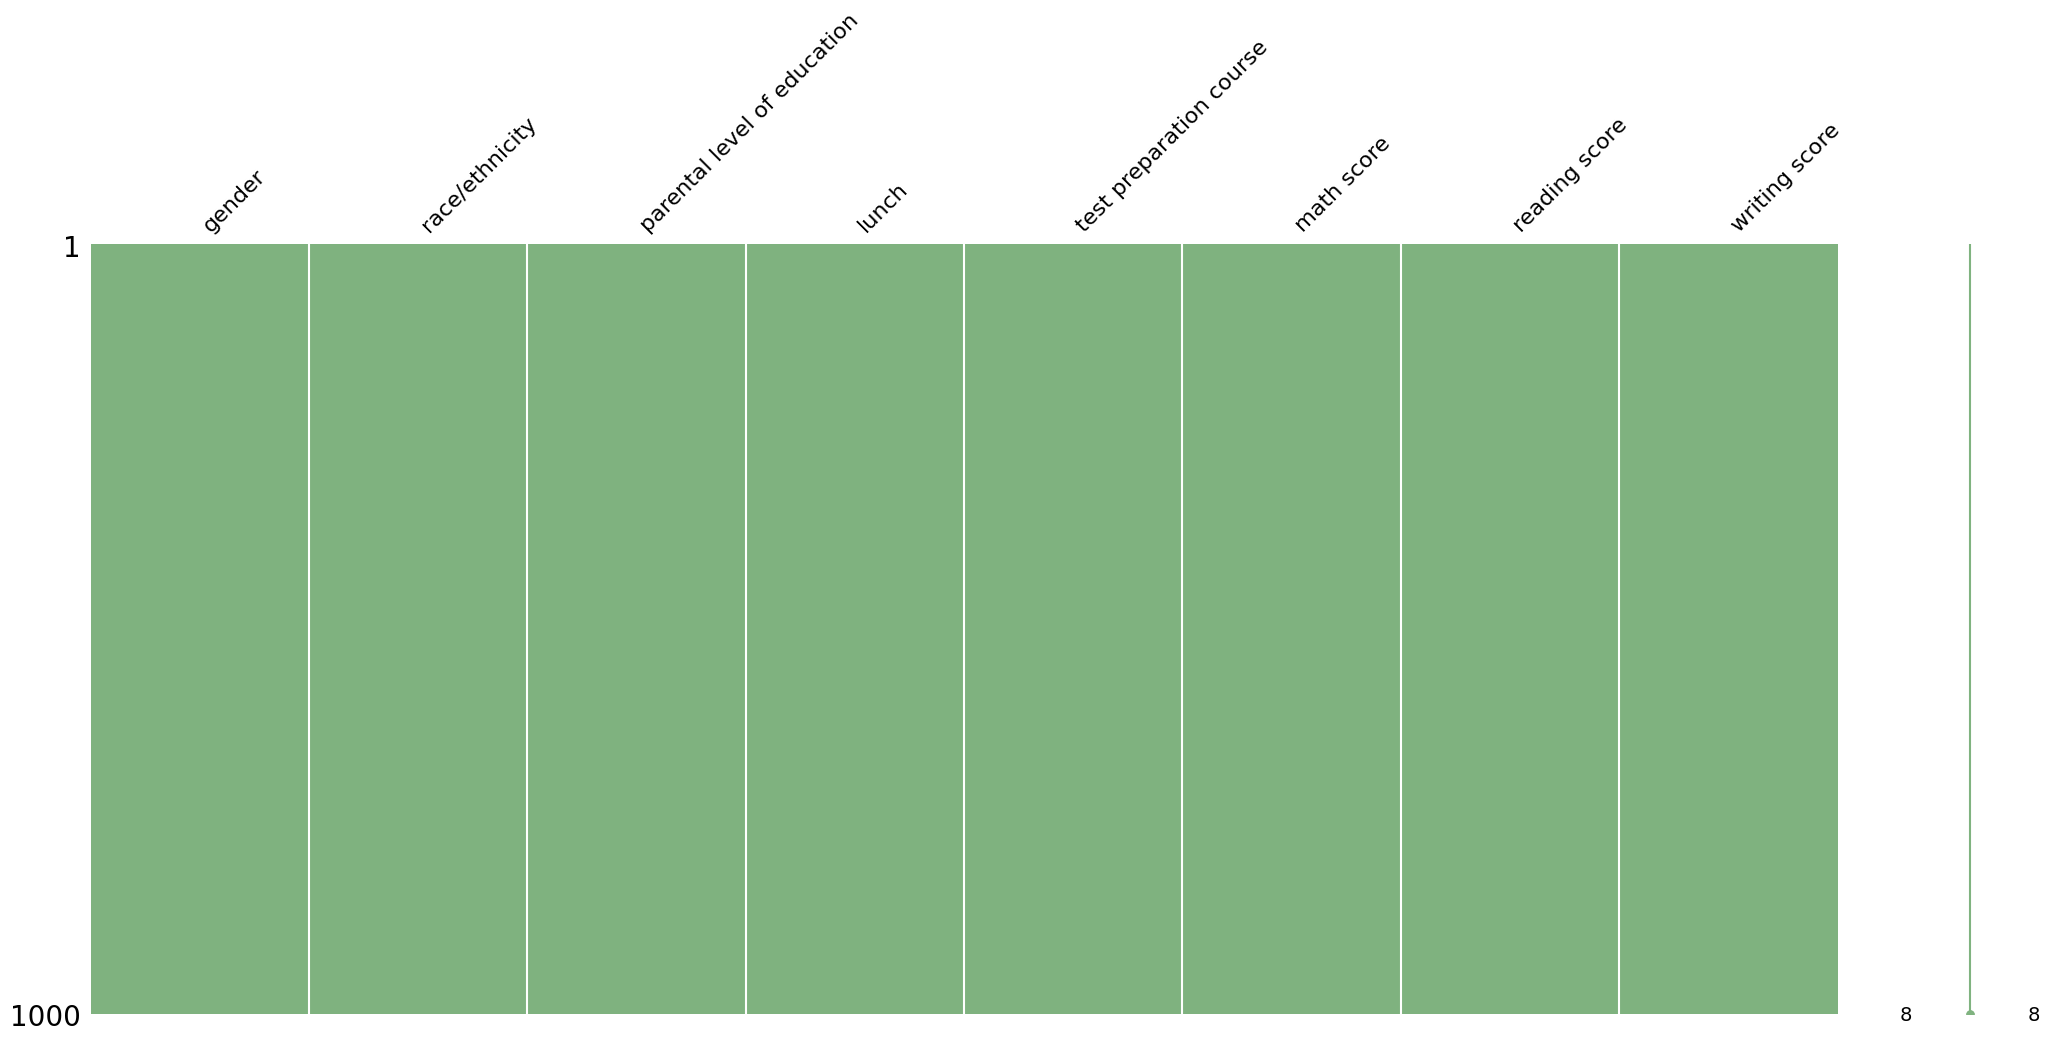

In [ ]:
print_dataframe_info(df_prediction)

Этот набор данных содержит информацию об успеваемости старшеклассников по математике, включая их оценки и демографическую информацию.


### Для каких целей этот датасет может быть использован:

1. Анализ влияния демографических факторов на успеваемость: Исследование, как различные факторы, такие как пол, раса/этническая принадлежность и уровень образования родителей, могут влиять на успех учащихся в математике и других предметах.

2. Оценка эффективности программ образования: Изучение того, как успешно студенты, прошедшие курсы подготовки к тестам, справляются с математическими оценками по сравнению с теми, кто не проходил такие курсы.

3. Разработка моделей прогнозирования успеваемости: Использование машинного обучения для создания моделей, которые могут предсказывать успеваемость учащихся на основе их демографических характеристик, уровня образования родителей и других переменных.

4. Оценка результатов образовательных программ: Понимание, насколько хорошо студенты показывают успехи в различных аспектах обучения, таких как математика, чтение и письмо, и какие факторы могут влиять на эти результаты.

5. Исследование социальных неравенств: Анализ того, как социальные и демографические факторы могут создавать неравенство в образовании и какие шаги можно предпринять для устранения этого неравенства.

## Education DataSet

https://www.kaggle.com/datasets/denisadutca/education-indicators-2014-worldwide

| Признак                            | Тип         | Шкала       |
|------------------------------------|-------------|-------------|
| Population                         | Числовой      | Порядковая   |
| GDP                                | Числовой      | Интервальная |
| Percentage of repeaters in Primary Education | Числовой  | Процентная  |
| Out-of-school children of Primary School   | Числовой  | Абсолютная  |
| Enrolment in Secondary Education   | Числовой      | Абсолютная  |
| Enrolment in Primary Education    | Числовой      | Абсолютная  |
| Unemployment                       | Числовой      | Процентная  |
| Life expectancy at birth          | Числовой      | Интервальная |
| Theoretical Duration of Primary Education  | Числовой  | Порядковая   |

Основная информация:

Размерность: 107 рядов x 10 колонок


,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
Тип,object,int64,float64,float64,int64,int64,int64,float64,float64,int64
Пустые значения,0,0,0,0,0,0,0,0,0,0
Уникальные значения,107,105,105,96,105,105,105,90,101,4



Пример строк:


,Country Name,PPT,GDP,PRPE,OOCP,ESE,EPE,UNEMP,LEB,TDP
47,IDA total,1623804434,2.374880e+12,7.05,43035372,104578088,225078480,5.87,63.41,6
104,Upper middle income,2573612474,2.202420e+13,2.55,8831078,201880784,206630624,5.90,74.44,6
19,Cabo Verde,513906,1.881497e+09,9.02,1041,59823,67023,9.20,73.15,6
58,Latin America&Caribbean,626285603,6.232860e+12,4.77,3633176,64141980,65342340,6.58,74.94,6
89,El Salvador,6107706,2.505420e+10,6.06,40769,625060,777043,6.20,72.75,6


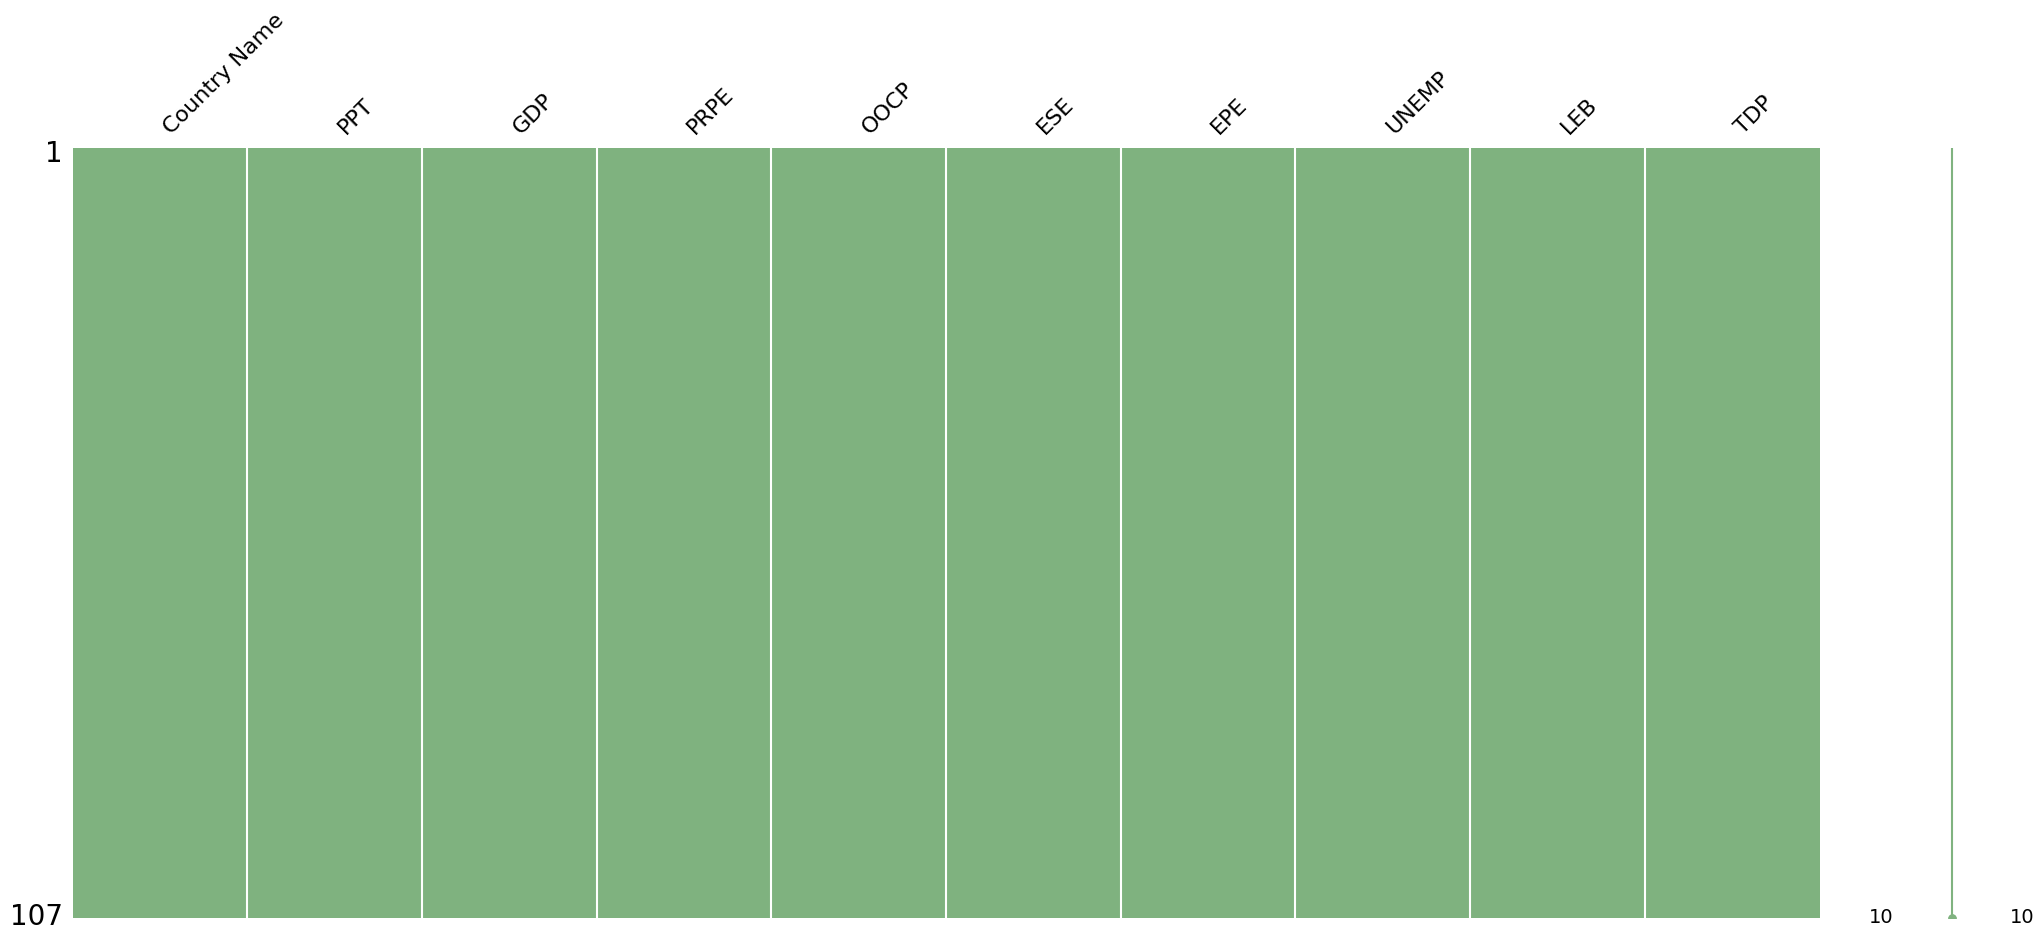

In [ ]:
print_dataframe_info(df_education)

Этот набор данных включает уровень школьного образования в 107 странах мира. Он может быть использован для анализа взаимосвязи между сферами образования, демографией и экономикой. С его помощью можно исследовать, как показатели, такие как уровень безработицы, ВВП и продолжительность жизни, связаны с образованием и посещаемостью школ.


### Для каких целей этот датасет может быть использован:

1. Для сравнительного анализа уровня образования между различными странами, что может помочь в выявлении успешных методов образования и тех областей, где требуется улучшение.

2. Для понимания влияния различных факторов, таких как ВВП, безработица и ожидаемая продолжительность жизни, на уровень образования в различных странах.

3. Для разработки образовательных политик и программ национального и международного уровня, основанных на данных о сравнительном уровне образования.

4. Для идентификации тенденций и изменений в сфере образования во времени и в разных регионах мира.

5. Для поддержки исследований и проектов, направленных на повышение качества образования и улучшение доступности образовательных ресурсов в мире.

## Students Performance

https://www.kaggle.com/datasets/joebeachcapital/students-performance

| Признак                                                   | Тип           | Шкала       |
|-----------------------------------------------------------|---------------|-------------|
| Student ID                                               | Идентификатор  | Уникальный   |
| Student Age                                              | Категориальный | Порядковая   |
| Sex                                                      | Категориальный | Номинальная  |
| Graduated high-school type                               | Категориальный | Номинальная  |
| Scholarship type                                         | Категориальный | Порядковая   |
| Additional work                                          | Категориальный | Номинальная  |
| Regular artistic or sports activity                      | Категориальный | Номинальная  |
| Do you have a partner                                    | Категориальный | Номинальная  |
| Total salary if available                                | Категориальный | Порядковая   |
| Transportation to the university                         | Категориальный | Номинальная  |
| Accommodation type in Cyprus                             | Категориальный | Номинальная  |
| Mothers’ education                                       | Категориальный | Порядковая   |
| Fathers’ education                                       | Категориальный | Порядковая   |
| Number of sisters/brothers (if available)                | Категориальный | Порядковая   |
| Parental status                                          | Категориальный | Номинальная  |
| Mothers’ occupation                                      | Категориальный | Номинальная  |
| Fathers’ occupation                                      | Категориальный | Номинальная  |
| Weekly study hours                                       | Категориальный | Порядковая
| Reading frequency (non-scientific books/journals)          | Категориальный | Порядковая   |
| Reading frequency (scientific books/journals)              | Категориальный | Порядковая   |
| Attendance to the seminars/conferences related to the department | Категориальный | Номинальная  |
| Impact of your projects/activities on your success         | Категориальный | Номинальная  |
| Attendance to classes                                      | Категориальный | Порядковая   |
| Preparation to midterm exams 1                             | Категориальный | Номинальная  |
| Preparation to midterm exams 2                             | Категориальный | Порядковая   |
| Taking notes in classes                                   | Категориальный | Порядковая   |
| Listening in classes                                      | Категориальный | Порядковая   |
| Discussion improves my interest and success in the course | Категориальный | Порядковая   |
| Flip-classroom                                            | Категориальный | Порядковая   |
| Cumulative grade point average in the last semester       | Категориальный | Порядковая   |
| Expected Cumulative grade point average in the graduation  | Категориальный | Порядковая   |
| Course ID                                                 | Идентификатор  | Уникальный   |
| OUTPUT Grade                                              | Категориальный | Порядковая   |


Основная информация:

Размерность: 145 рядов x 33 колонок


,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
Тип,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Пустые значения,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Уникальные значения,145,3,2,3,5,2,2,2,5,4,...,3,3,3,3,3,3,5,4,9,8



Пример строк:


,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
128,STUDENT129,1,1,2,4,2,1,1,1,4,...,1,1,3,2,2,1,2,2,9,0
124,STUDENT125,1,1,2,4,1,1,1,1,1,...,2,2,3,3,2,1,3,3,9,3
59,STUDENT60,2,2,2,3,2,1,1,1,1,...,1,1,3,3,2,2,4,3,1,5
82,STUDENT83,2,2,2,4,1,2,1,2,1,...,1,1,3,3,2,3,4,3,5,7
100,STUDENT101,1,2,2,4,2,2,2,1,2,...,1,1,2,2,2,1,3,3,7,6


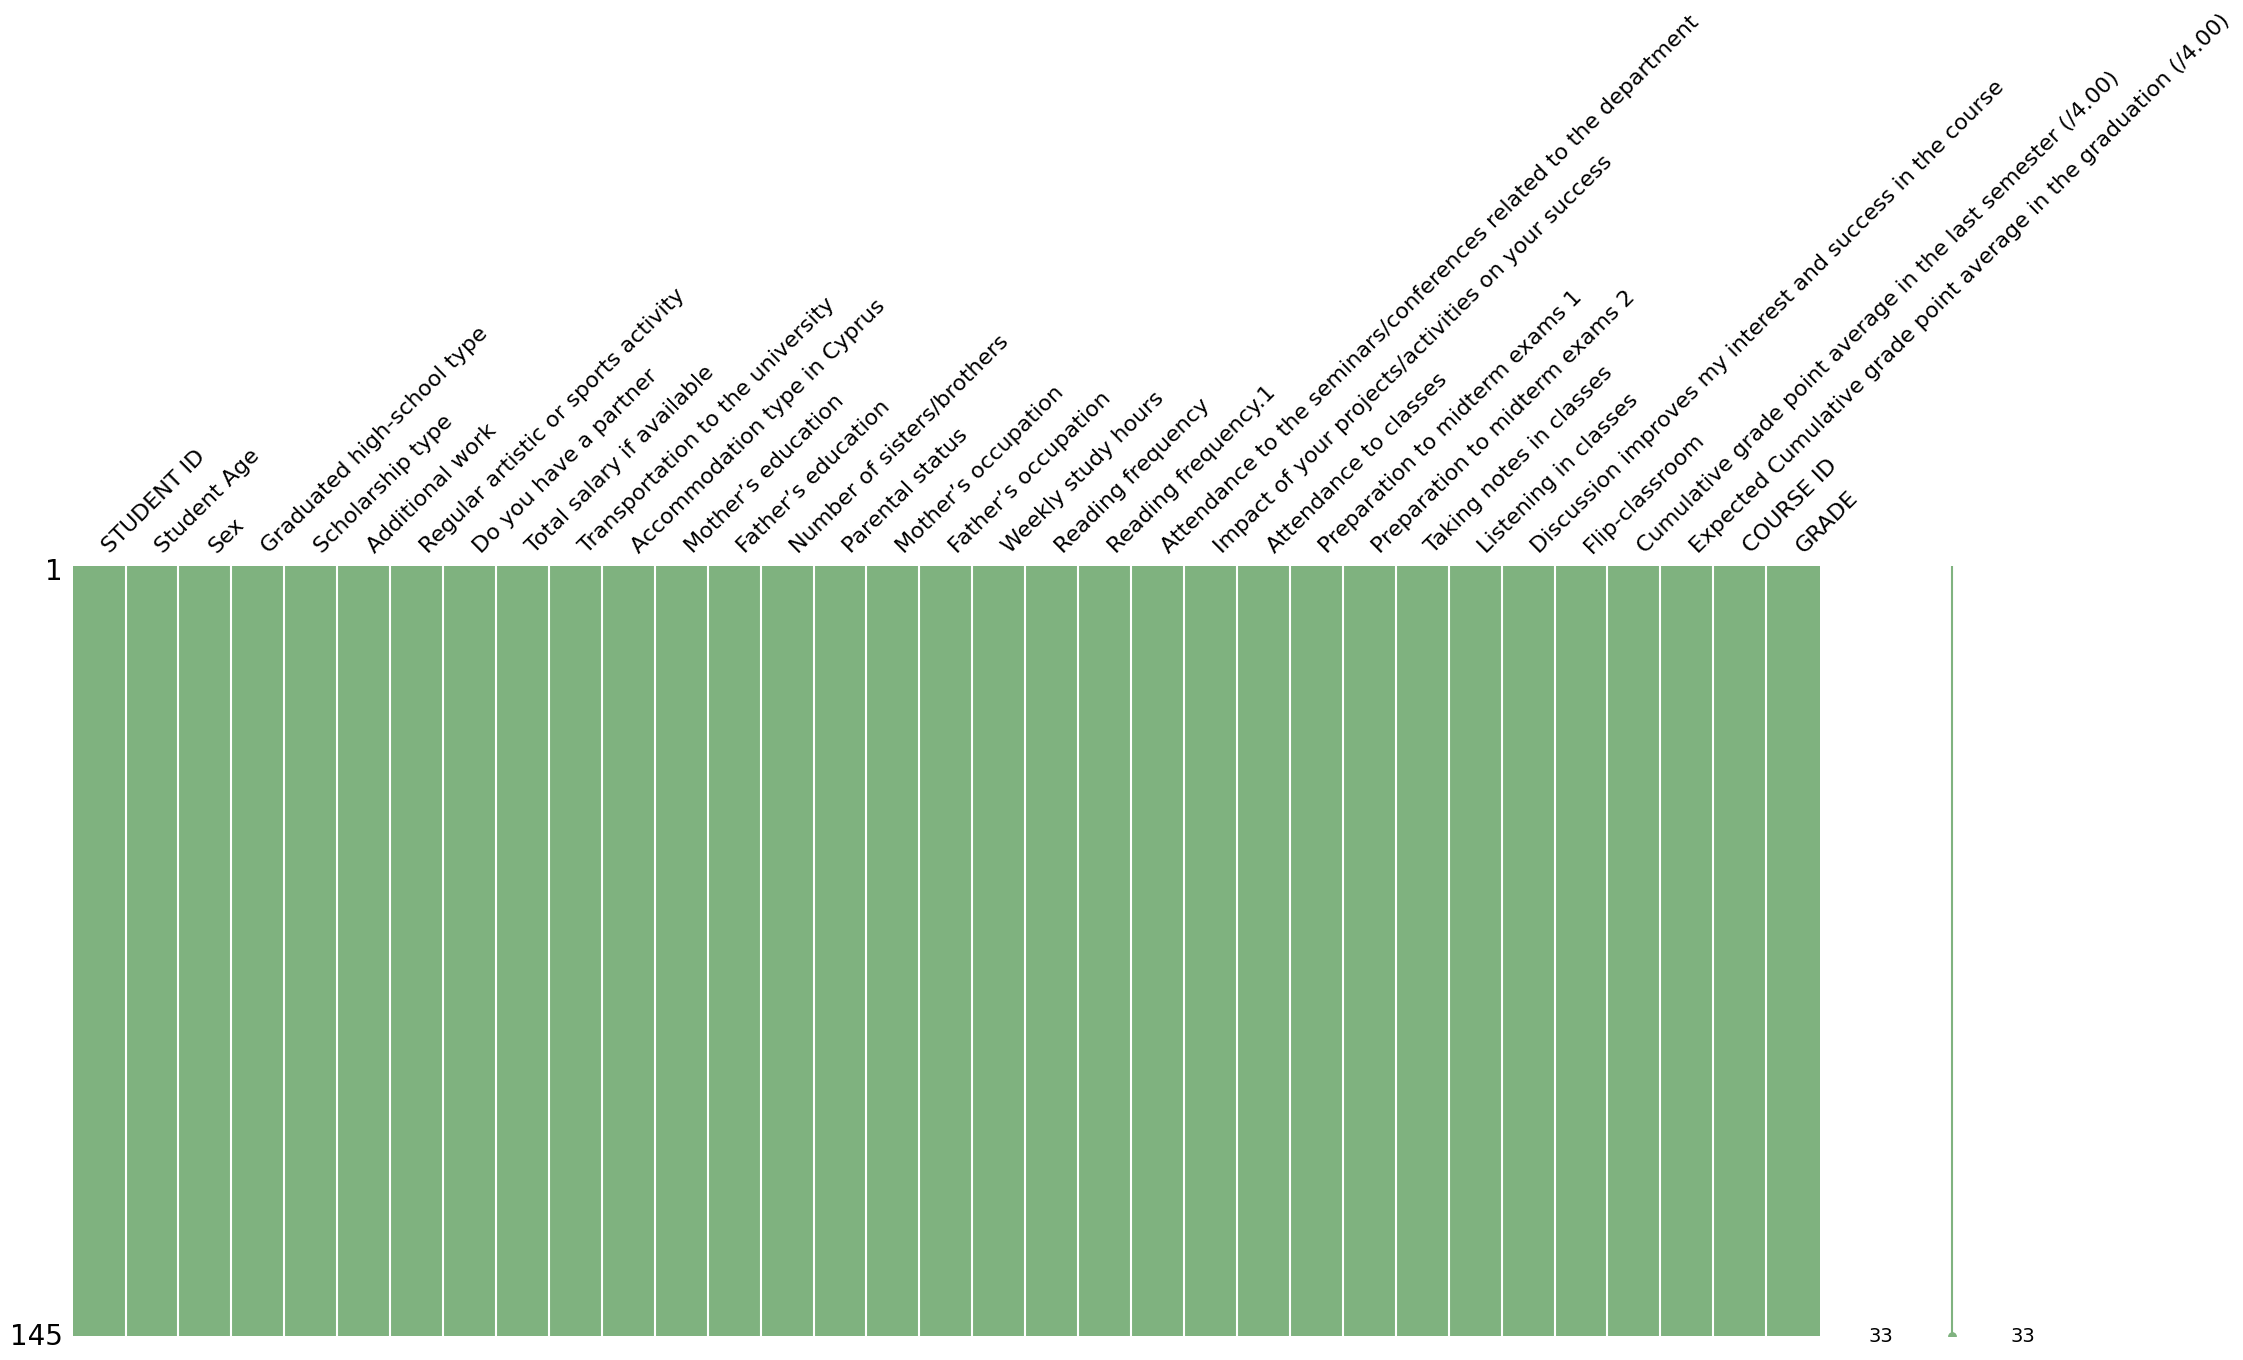

In [ ]:
print_dataframe_info(df_perfomance)

Этот набор данных позволяет изучить, как разные вещи, такие как возраст, семейные условия, стипендии или привычки к учебе - то есть большинство важных факторов, которые позволят  прогнозировать успеваемость студентов в конце семестра на Кипре.


### Для каких целей этот датасет может быть использован:

1. Прогностическое моделирование: Исследователи или педагоги могут построить прогностические модели для прогнозирования оценок студентов к концу семестра на основе различных факторов, таких как демографическая информация, семейный фон, образовательные привычки и предыдущая успеваемость.

2. Выявление факторов, влияющих на успеваемость: Анализируя набор данных, можно определить, какие факторы имеют наибольшее влияние на академическую успеваемость студентов. Это поможет образовательным учреждениям создавать меры поддержки или системы поддержки для студентов, находящихся под риском неуспеваемости.

3. Разработка политики: Образовательные политики могут использовать выводы из набора данных для разработки целевых политик, направленных на улучшение результатов студентов. Например, если данные указывают на то, что проблемы с транспортом коррелируют с более низкими оценками, политики могут инвестировать в улучшение транспортных услуг для студентов.

4. Персонализированное образование: Школы или педагоги могут использовать набор данных для персонализации образования для студентов на основе их индивидуальных характеристик и образовательных привычек. Например, если данные показывают, что студенты, занимающиеся регулярно художественной или спортивной деятельностью, склонны к лучшим результатам, школы могут включить больше внеурочных мероприятий в свою учебную программу.

5. Психолого-педагогическое сопровождение и поддержка студентов: Психологи и службы поддержки в образовательных учреждениях могут использовать набор данных для выявления студентов, которые могут нуждаться в дополнительной помощи или руководстве. Например, если родители студента имеют низкий уровень образования, это может указывать на необходимость дополнительной академической поддержки.

## Вывод по анализу датасетов

При анализе данных мы выяснили, что все датасеты предоставляют разные виды данных, схожие в некоторых аспектах, но датасет "Students Perfomance" дает большее количество информации, на основе которых можно делать разные оценки и выводы, также он дает больший пласт для действий в будущем, которые можно совершить используя данный датасет.

## Декодировка информации в выбраном датасете на релевантную

Так как данные в датасете данные представлены в виде баллов, мы декодируем их, используя расшифровку, указанную в описании датасета.

In [ ]:
df_perfomance.columns = df_perfomance.columns.str.strip()

decoding_info = {
    'Student Age': {1: '18-21', 2: '22-25', 3: 'above 26'},
    'Sex': {1: 'female', 2: 'male'},
    'Graduated high-school type': {1: 'private', 2: 'state', 3: 'other'},
    'Scholarship type': {1: 'None', 2: '25%', 3: '50%', 4: '75%', 5: 'Full'},
    'Additional work': {1: 'Yes', 2: 'No'},
    'Regular artistic or sports activity': {1: 'Yes', 2: 'No'},
    'Do you have a partner': {1: 'Yes', 2: 'No'},
    'Total salary if available': {
        1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'above 410'
    },
    'Transportation to the university': {1: 'Bus', 2: 'Private car/taxi', 3: 'bicycle', 4: 'Other'},
    'Accommodation type in Cyprus': {1: 'rental', 2: 'dormitory', 3: 'with family', 4: 'Other'},
    'Mother’s education': {
        1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'
    },
    'Father’s education': {
        1: 'primary school', 2: 'secondary school', 3: 'high school', 4: 'university', 5: 'MSc.', 6: 'Ph.D.'
    },
    'Number of sisters/brothers': {1: '1', 2: '2', 3: '3', 4: '4', 5: '5 or above'},
    'Parental status': {1: 'married', 2: 'divorced', 3: 'died - one of them or both'},
    'Mother’s occupation': {
        1: 'retired', 2: 'housewife', 3: 'government officer', 4: 'private sector employee', 5: 'self-employment', 6: 'other'
    },
    'Father’s occupation': {
        1: 'retired', 2: 'government officer', 3: 'private sector employee', 4: 'self-employment', 5: 'other'
    },
    'Weekly study hours': {1: 'None', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'more than 20 hours'},
    'Reading frequency (non-scientific books/journals)': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'Reading frequency (scientific books/journals)': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'Attendance to the seminars/conferences related to the department': {1: 'Yes', 2: 'No'},
    'Impact of your projects/activities on your success': {1: 'positive', 2: 'negative', 3: 'neutral'},
    'Attendance to classes': {1: 'always', 2: 'sometimes', 3: 'never'},
    'Preparation to midterm exams 1': {1: 'alone', 2: 'with friends', 3: 'not applicable'},
    'Preparation to midterm exams 2': {
        1: 'closest date to the exam', 2: 'regularly during the semester', 3: 'never'
    },
    'Taking notes in classes': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Listening in classes': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Discussion improves my interest and success in the course': {1: 'never', 2: 'sometimes', 3: 'always'},
    'Flip-classroom': {1: 'not useful', 2: 'useful', 3: 'not applicable'},
    'Cumulative grade point average in the last semester (/4.00)': {
        1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'
    },
    'Expected Cumulative grade point average in the graduation (/4.00)': {
        1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'above 3.49'
    },
    'GRADE': {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}
}

copy_df_perfomance = df_perfomance.copy()

for column in copy_df_perfomance.columns:
    if column in decoding_info:
        copy_df_perfomance[column] = copy_df_perfomance[column].map(decoding_info[column])

copy_df_perfomance.to_csv("df.csv", index=False)

In [ ]:
df = pd.read_csv('/content/df.csv')
df.columns = df.columns.str.strip()

grade_order = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']

# print(df.sample(5))

In [ ]:
df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,never,useful,<2.00,<2.00,1,DD
1,STUDENT2,22-25,male,other,50%,Yes,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,sometimes,always,useful,2.00-2.49,2.50-2.99,1,DD
2,STUDENT3,22-25,male,state,50%,No,No,No,USD 201-270,Other,...,alone,closest date to the exam,sometimes,sometimes,never,not useful,2.00-2.49,2.00-2.49,1,DD
3,STUDENT4,18-21,female,private,50%,Yes,No,Yes,USD 201-270,Bus,...,alone,regularly during the semester,always,sometimes,sometimes,not useful,2.50-2.99,2.00-2.49,1,DD
4,STUDENT5,22-25,male,private,50%,No,No,Yes,USD 271-340,Bus,...,with friends,closest date to the exam,sometimes,sometimes,sometimes,not useful,2.00-2.49,2.00-2.49,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,female,state,50%,Yes,Yes,No,USD 135-200,Bus,...,alone,closest date to the exam,sometimes,never,sometimes,not useful,2.50-2.99,2.50-2.99,9,BB
141,STUDENT142,18-21,female,state,75%,No,No,No,USD 135-200,Other,...,alone,closest date to the exam,always,sometimes,sometimes,not useful,above 3.49,2.50-2.99,9,BB
142,STUDENT143,18-21,female,private,75%,No,No,No,USD 135-200,Bus,...,alone,closest date to the exam,always,always,sometimes,not useful,3.00-3.49,2.50-2.99,9,DD
143,STUDENT144,22-25,female,state,75%,Yes,Yes,Yes,above 410,Private car/taxi,...,with friends,closest date to the exam,sometimes,never,sometimes,not useful,above 3.49,2.50-2.99,9,CB


# Гипотезы

## Формулировка гипотез

1. Возраст и успех в учебе: Существует взаимосвязь между возрастной категорией студента и его оценками.

2. Пол и успеваемость: Студенты женского пола получают более высокие оценки, чем студенты мужского пола.

3. Тип школы и успеваемость: Студенты, закончившие частную школу, имеют более высокие оценки, чем студенты из государственных или других школ.

4. Тип стипендии и успеваемость: Студенты с большей стипендией имеют более высокие оценки, чем студенты с меньшей или без стипендии.

5. Дополнительная работа и успеваемость: Студенты, работающие дополнительно, имеют более низкие оценки, чем студенты, которые не работают.

6. Активность в спорте или искусстве и успеваемость: Студенты, занимающиеся спортом или искусством, получают более высокие оценки, чем те, кто не участвует в таких мероприятиях.

7. Наличие партнера и успеваемость: Студенты, имеющие партнера, получают более низкие оценки, чем те, у кого партнера нет.

8. Тип транспорта и успеваемость: Существует взаимосвязь между типом транспорта, используемого студентами, и их успеваемостью.

9. Тип проживания и успеваемость: Студенты, проживающие с семьей, получают более высокие оценки, чем студенты, проживающие в общежитии или на съемной квартире.

10. Образование родителей и успеваемость: Студенты, чьи родители имеют высшее образование, получают более высокие оценки, чем те, у кого родители имеют более низкий уровень образования.

11. Часы обучения и успеваемость: Студенты, которые тратят больше времени на учебу, получают более высокие оценки.

12. Участие в семинарах и успеваемость: Студенты, которые посещают семинары, получают более высокие оценки.

13. Подготовка к экзаменам и успеваемость: Студенты, которые готовятся к экзаменам заранее, получают более высокие оценки, чем те, кто готовится непосредственно перед экзаменом.

14. Стиль заметок и успеваемость: Студенты, которые всегда записывают лекции, получают более высокие оценки, чем те, кто делает это иногда или никогда.

15. Влияние обсуждений и успеваемость: Студенты, которые считают обсуждения полезными, имеют более высокие оценки, чем те, кто не считает это важным.

16. Дополнительная работа и статус отношений родителей: Студенты, у которых родители разведены или один из них погиб, имеют работу

## Подтвердившиеся гипотезы

### 5. Дополнительная работа и успеваемость

Студенты, работающие дополнительно, имеют более низкие оценки, чем студенты, которые не работают.

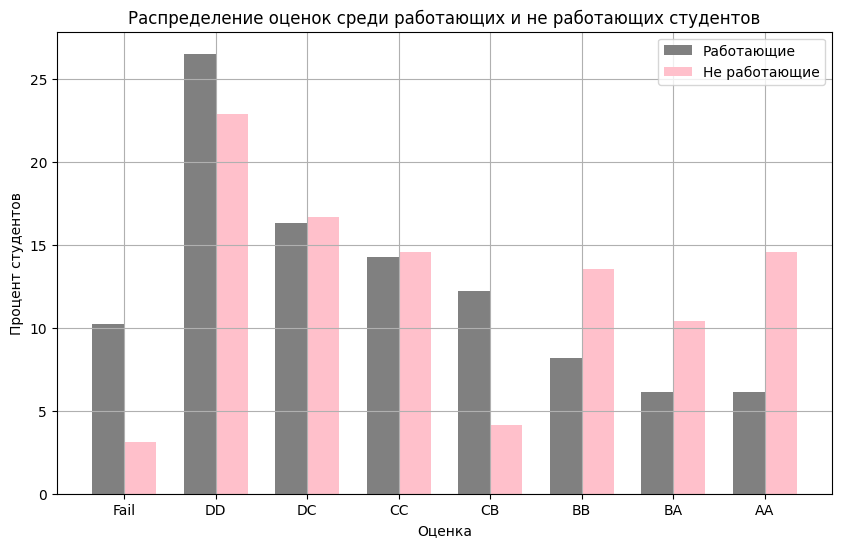

In [ ]:
working_students = df[df['Additional work'] == 'Yes']
non_working_students = df[df['Additional work'] == 'No']

working_grade_percentages = (working_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]
non_working_grade_percentages = (non_working_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, working_grade_percentages, bar_width, color='grey', label='Работающие')
plt.bar([i + bar_width for i in index], non_working_grade_percentages, bar_width, color='pink', label='Не работающие')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди работающих и не работающих студентов')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()

Можно сказать, что гипотеза подтвердилась, так как среди провалившихся студентов и тех, кто получил 3-, больше работающих, чем не имеющих работу. Также среди отличников и хорошистов гораздо больше не работающих.

Проверим себя, посчитав средний балл и тех, и других:

In [ ]:
grade_mapping = {'Fail': 1, 'DD': 2, 'DC': 2.5, 'CC': 3, 'CB': 3.5, 'BB': 4, 'BA': 4.5, 'AA': 5}

# Вычислим средний балл для каждой группы студентов
working_mean_grade = working_students['GRADE'].map(grade_mapping).mean()
non_working_mean_grade = non_working_students['GRADE'].map(grade_mapping).mean()

print("Средний балл студентов, работающих дополнительно:", working_mean_grade)
print("Средний балл студентов, не работающих дополнительно:", non_working_mean_grade)

Средний балл студентов, работающих дополнительно: 2.806122448979592
Средний балл студентов, не работающих дополнительно: 3.2291666666666665


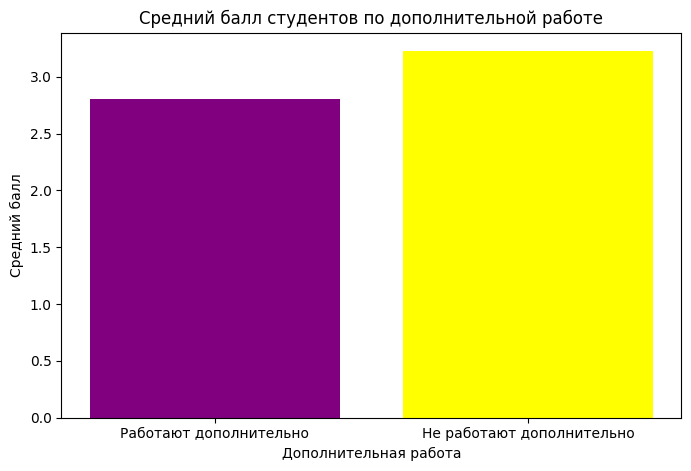

In [ ]:
groups = ['Работают дополнительно', 'Не работают дополнительно']

mean_grades = [working_mean_grade, non_working_mean_grade]

plt.figure(figsize=(8, 5))
plt.bar(groups, mean_grades, color=['purple', 'yellow'])

plt.title('Средний балл студентов по дополнительной работе')
plt.xlabel('Дополнительная работа')
plt.ylabel('Средний балл')

plt.show()

### 6. Активность в спорте или искусстве и успеваемость

Студенты, занимающиеся спортом или искусством, получают более высокие оценки, чем те, кто не участвует в таких мероприятиях.

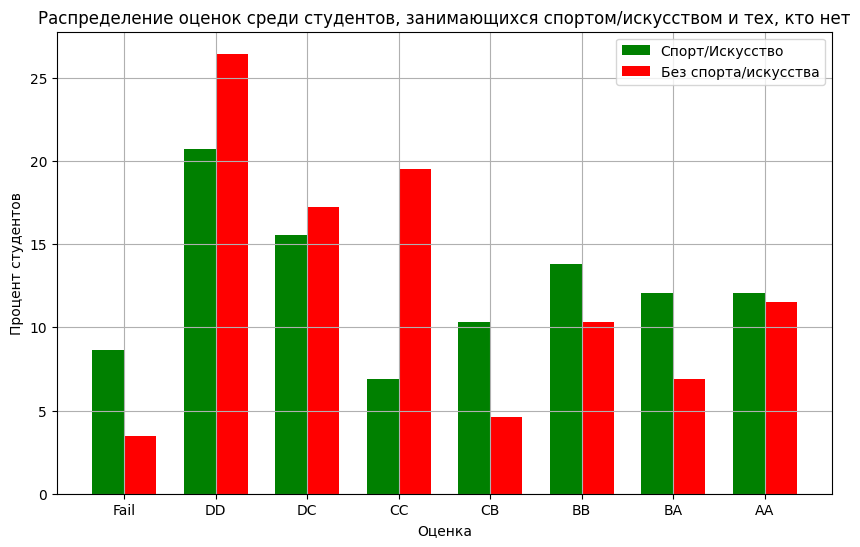

In [ ]:
sport_art_students = df[df['Regular artistic or sports activity'] == 'Yes']
non_sport_art_students = df[df['Regular artistic or sports activity'] == 'No']

sport_art_grade_percentages = (sport_art_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]
non_sport_art_grade_percentages = (non_sport_art_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, sport_art_grade_percentages, bar_width, color='green', label='Спорт/Искусство')
plt.bar([i + bar_width for i in index], non_sport_art_grade_percentages, bar_width, color='red', label='Без спорта/искусства')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, занимающихся спортом/искусством и тех, кто нет')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()

Можно сказать, что гипотеза подтвердилась, так как среди отличников и хорошистов больше тех, кто занимается спортом/искусством. Можем проверить себя, посчитав средний балл.


In [ ]:
# Вычислим средний балл для каждой группы студентов
sport_art_mean_grade = sport_art_students['GRADE'].map(grade_mapping).mean()
non_sport_art_mean_grade = non_sport_art_students['GRADE'].map(grade_mapping).mean()

print("Средний балл студентов, занимающихся спортом/искусством:", sport_art_mean_grade)
print("Средний балл студентов, не занимающихся спортом/искусством:", non_sport_art_mean_grade)

Средний балл студентов, занимающихся спортом/искусством: 3.1551724137931036
Средний балл студентов, не занимающихся спортом/искусством: 3.0402298850574714


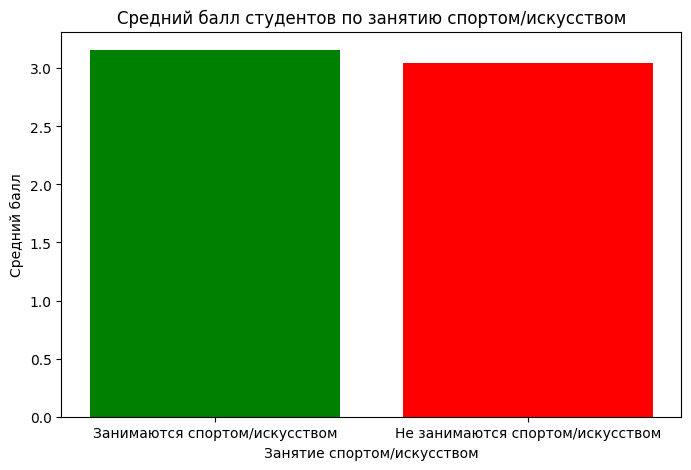

In [ ]:
groups = ['Занимаются спортом/искусством', 'Не занимаются спортом/искусством']

mean_grades = [sport_art_mean_grade, non_sport_art_mean_grade]

plt.figure(figsize=(8, 5))
plt.bar(groups, mean_grades, color=['green', 'red'])

plt.title('Средний балл студентов по занятию спортом/искусством')
plt.xlabel('Занятие спортом/искусством')
plt.ylabel('Средний балл')

plt.show()

### 10. Образование родителей и успеваемость

In [ ]:
df_melted = pd.melt(
    df,
    id_vars=['STUDENT ID', 'GRADE'],
    value_vars=['Mother’s education', 'Father’s education'],
    var_name='Parent',
    value_name='Education Level'
)

fig = px.box(
    df_melted,
    x='Education Level',
    y='GRADE',
    color='Parent',
    title="Student Grades by Parental Education Level",
    category_orders={
        "GRADE": ["AA", "BA", "BB", "CB", "CC", "DC", "DD", "Fail"],
        'Education Level': ['primary school', 'secondary school', 'high school', 'university', 'MSc.', 'Ph.D.']
    },
    color_discrete_map={'Mother': '#6AD4DD', 'Father': '#7AA2E3'}
)

fig.update_layout(
    xaxis_title="Parental Education Level",
    yaxis_title="Grade",
    xaxis={'type': 'category'}
)

fig.show()

Можно считать, что гипотеза подтвердилась. Как мы можем заметить, до высшей школы включительно оценки у всех примерно равны, но как только у родителей появляется высшее, то оценки студентов явно улучшаются, но родителей с высшим образованием по типу MSc. и Ph.D. достаточно мало, что видно у отцов с Ph.D., который всего один. Точное количество указано ниже:

In [ ]:
mother_education_counts = df['Mother’s education'].value_counts()
father_education_counts = df['Father’s education'].value_counts()

print(f"Количество уровней образования у матерей:\n{mother_education_counts}")
print(f"\nКоличество уровней образования у отцов:\n{father_education_counts}")


Количество уровней образования у матерей:
Mother’s education
primary school      54
high school         39
secondary school    27
university          21
MSc.                 2
Ph.D.                2
Name: count, dtype: int64

Количество уровней образования у отцов:
Father’s education
high school         46
secondary school    36
primary school      29
university          28
MSc.                 5
Ph.D.                1
Name: count, dtype: int64


В данном случае блочный график выглядит не объективно, поэтому построим иной график.

In [ ]:
grade_mapping = {
    'Fail': 0, 'DD': 1, 'DC': 2, 'CC': 3, 'CB': 4, 'BB': 5, 'BA': 6, 'AA': 7
}

df_melted['Normalized_Grade'] = df_melted.groupby(['Education Level', 'Parent'])['GRADE'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

avg_normalized_grades = df_melted.groupby(['Education Level', 'Parent'])['Normalized_Grade'].mean().reset_index()

fig = px.bar(
    avg_normalized_grades,
    x='Education Level',
    y='Normalized_Grade',
    color='Parent',
    barmode='group',
    title="Average Normalized Student Grade by Parental Education Level",
    category_orders={'Education Level': ['primary school', 'secondary school', 'high school', 'university', 'MSc.', 'Ph.D.']},
    color_discrete_map={'Mother': '#E65C19', 'Father': '#640D6B'}
)

fig.show()

### 12. Участие в семинарах и успеваемость

Студенты, которые посещают семинары, получают более высокие оценки.

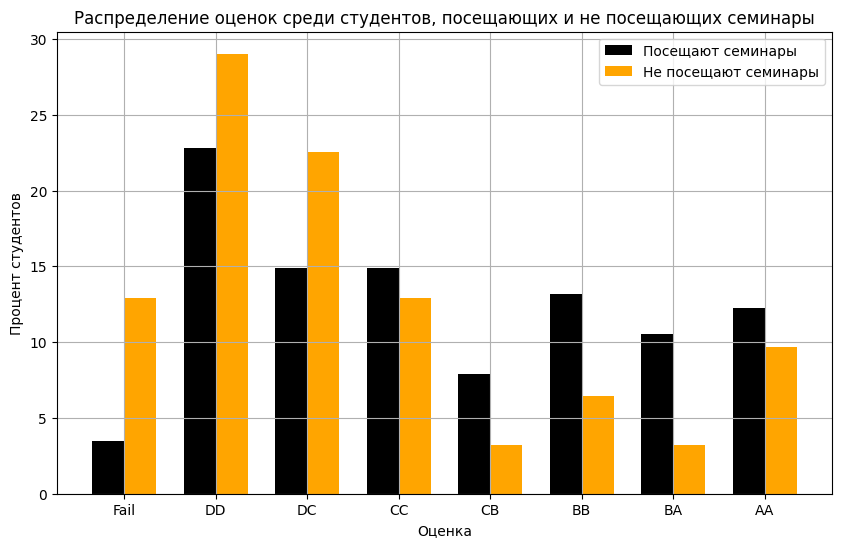

In [ ]:
seminar_attendees = df[df['Attendance to the seminars/conferences related to the department'] == 'Yes']
non_attendees = df[df['Attendance to the seminars/conferences related to the department'] == 'No']

seminar_attendee_grade_percentages = (seminar_attendees['GRADE'].value_counts(normalize=True) * 100)[grade_order]
non_attendee_grade_percentages = (non_attendees['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, seminar_attendee_grade_percentages, bar_width, color='black', label='Посещают семинары')
plt.bar([i + bar_width for i in index], non_attendee_grade_percentages, bar_width, color='orange', label='Не посещают семинары')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, посещающих и не посещающих семинары')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()

Здесь мы однозначно видим, что гипотеза подтвердилась. Но проанализируем также средние баллы для большей наглядности.

In [ ]:
seminar_attendee_mean_grade = seminar_attendees['GRADE'].map(grade_mapping).mean()
non_attendee_mean_grade = non_attendees['GRADE'].map(grade_mapping).mean()

print("Средний балл студентов, посещающих семинары:", seminar_attendee_mean_grade)
print("Средний балл студентов, не посещающих семинары:", non_attendee_mean_grade)

Средний балл студентов, посещающих семинары: 3.43859649122807
Средний балл студентов, не посещающих семинары: 2.4516129032258065


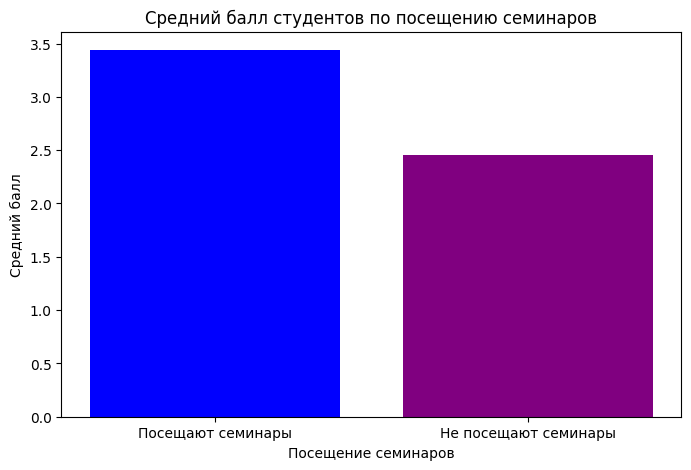

In [ ]:
groups = ['Посещают семинары', 'Не посещают семинары']

mean_grades = [seminar_attendee_mean_grade, non_attendee_mean_grade]

plt.figure(figsize=(8, 5))
plt.bar(groups, mean_grades, color=['blue', 'purple'])

plt.title('Средний балл студентов по посещению семинаров')
plt.xlabel('Посещение семинаров')
plt.ylabel('Средний балл')

plt.show()

### 16. Дополнительная работа и статус отношений родителей

In [ ]:
count_df = df.groupby(['Parental status', 'Additional work']).size().reset_index(name='Count')
count_df['Proportion'] = count_df.groupby('Parental status')['Count'].transform(lambda x: x / x.sum())
count_df_with_work = count_df[count_df['Additional work'] == 'Yes']


fig = px.pie(
    count_df_with_work,
    values='Proportion',
    names='Parental status',
    title='Proportion of Students with Additional Work by Parental Status',
    hole=0.3
)

fig.update_traces(
    textinfo='percent',
    textfont_size=16,
    marker=dict(
        colors=['#E65C19', '#F8D082', '#640D6B'],
        line=dict(color='#FFFFFF', width=2)
    )
)

fig.update_layout(
    title_x=0.5,
    title_font_family="Arial",
    title_font_size=24,
    legend_title="Parental Status",
    legend_font_family="Arial",
    legend_font_size=18,
    showlegend=True
)

fig.show()

После визуализации стало ясно, что и правда большинство тех студентов, у кого родители развелись или кто-то из них погиб, дополнительно к учебе работают, поэтому гипотеза подтвердилась.

## Опровергнутые гипотезы

### 1. Возраст и успех в учебе

Существует взаимосвязь между возрастной категорией студента и его оценками.

In [ ]:
import plotly.express as px

students_order = ["18-21", "22-25", "above 26"]

fig = px.box(df, x = 'Student Age', y = 'GRADE', category_orders={'GRADE': grade_order[::-1], 'Student Age': students_order})
fig.show()

В целом, гипотезу можно считать неподтвердившейся, так как медианное значение одинаково во всех группах - CC. Однако, стоит заметить, что доля студентов в возрасте 18-21, получающих оценки выше медианного значения выше.

### 2. Пол и успеваемость

Студенты женского пола получают более высокие оценки, чем студенты мужского пола.

In [ ]:
import plotly.express as px

fig = px.box(df, x='Sex', y='GRADE', category_orders={'GRADE': grade_order[::-1]})
fig.show()


Гипотеза опровергнута, студенты мужского пола получают более высокие оценки по сравнению со студентами женского пола.

### 3. Тип школы и успеваемость

Студенты, закончившие частную школу, имеют более высокие оценки, чем студенты из государственных или других школ.

In [ ]:
import plotly.express as px

fig = px.box(df, x='Graduated high-school type', y='GRADE',
             category_orders={'GRADE': grade_order[::-1]})
fig.show()


Гипотеза опровергнута, так как медианная оценка учащихся частных школ ниже

### 4. Тип стипендии и успеваемость

Студенты с большей стипендией имеют более высокие оценки, чем студенты с меньшей или без стипендии.

In [ ]:
import plotly.express as px

scholarship_order = ["25%", "50%", "75%", "Full"]


fig = px.violin(df, x='Scholarship type', y='GRADE',
                category_orders={'GRADE': grade_order[::-1],
                  'Scholarship type': scholarship_order},
                box=True, points='all')

fig.show()

В целом, может сказать, что гипотеза не подтвердилась, так как видим весомое «утолщение» в основании виолончели в группе стипендиантов с полным покрытием обучения.

### 7. Наличие партнера и успеваемость

In [ ]:
import plotly.express as px

df_grouped = df.groupby(['GRADE', 'Do you have a partner']).size().reset_index(name='count')
df_grouped['normalized_count'] = df_grouped.groupby('GRADE')['count'].transform(lambda x: x / x.sum())

colors = ["#121481", "#FFB1B1"]

fig = px.bar(
    df_grouped,
    x="GRADE",
    y="normalized_count",
    color="Do you have a partner",
    barmode='group',
    category_orders={"GRADE": ["Fail", "DD", "DC", "CC", "CB", "BB", "BA", "AA"]},
    color_discrete_sequence=colors,
    title="Distribution of grades by partner status"
)

fig.update_layout(
    xaxis_title="Grades",
    yaxis_title="Percentage of students",
    font=dict(family="Arial", size=12),
    plot_bgcolor="#f5f5f5",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="#e5e5e5"),
    legend=dict(title="", orientation="h", y=1.02, xanchor="center", x=0.5),
    bargap=0.15,
)

fig.show()

Гипотеза частично не подтвердилась, так как мы можем заметить, что в большей степени наличие партнера не мешает получению хороших оценок также, как и плохих, но среди тех, кто завалил, можем заметить, что преобладают люди, состоящие в отношениях.

### 8. Тип транспорта и успеваемость
Существует взаимосвязь между типом транспорта, используемого студентами, и их успеваемостью.

In [ ]:
import plotly.express as px

transport_order = ["Bus", "Private car/taxi", "bicycle", "Other"]

fig = px.violin(df, x='Transportation to the university', y='GRADE',
                category_orders={'GRADE': grade_order[::-1],
                  'Transportation to the university': transport_order},
                box=True, points='all')

fig.show()

In [ ]:
import plotly.express as px

transport_order = ["Bus", "Private car/taxi", "bicycle", "Other"]

fig = px.violin(df, x='Transportation to the university', y='GRADE',
                category_orders={'GRADE': grade_order[::-1],
                  'Transportation to the university': transport_order},
                box=True, points='all')

fig.show()

### 9. Тип проживания и успеваемость

Студенты, проживающие с семьей, получают более высокие оценки, чем студенты, проживающие в общежитии или на съемной квартире.

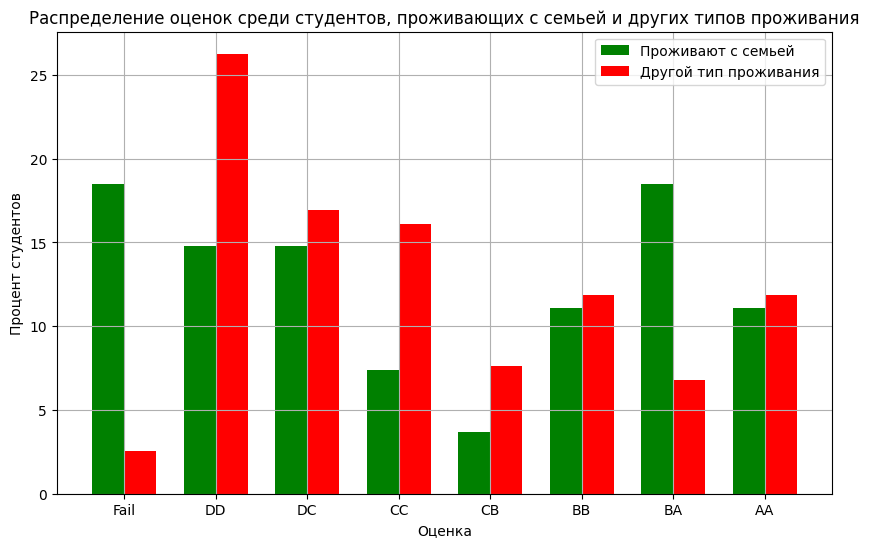

In [ ]:
with_family_students = df[df['Accommodation type in Cyprus'] == 'with family']
other_accommodation_students = df[(df['Accommodation type in Cyprus'] == 'rental') | (df['Accommodation type in Cyprus'] == 'dormitory') | (df['Accommodation type in Cyprus'] == 'Other')]

with_family_grade_percentages = (with_family_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]
other_accommodation_grade_percentages = (other_accommodation_students['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, with_family_grade_percentages, bar_width, color='green', label='Проживают с семьей')
plt.bar([i + bar_width for i in index], other_accommodation_grade_percentages, bar_width, color='red', label='Другой тип проживания')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, проживающих с семьей и других типов проживания')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()


По данному графику не получается однозначно определить подтвердилась ли гипотеза, поэтому проанализируем средние баллы.

In [ ]:
with_family_mean_grade = with_family_students['GRADE'].map(grade_mapping).mean()
other_accommodation_mean_grade = other_accommodation_students['GRADE'].map(grade_mapping).mean()

print("Средний балл студентов, проживающих с семьей:", with_family_mean_grade)
print("Средний балл студентов, проживающих в общежитии или на съемной квартире:", other_accommodation_mean_grade)

Средний балл студентов, проживающих с семьей: 3.259259259259259
Средний балл студентов, проживающих в общежитии или на съемной квартире: 3.2203389830508473


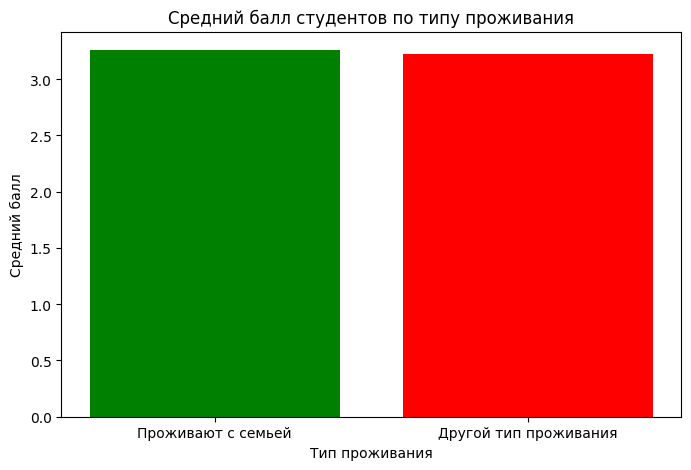

In [ ]:
groups = ['Проживают с семьей', 'Другой тип проживания']

# Создадим список средних баллов
mean_grades = [with_family_mean_grade, other_accommodation_mean_grade]

# Создадим столбчатую диаграмму
plt.figure(figsize=(8, 5))
plt.bar(groups, mean_grades, color=['green', 'red'])

plt.title('Средний балл студентов по типу проживания')
plt.xlabel('Тип проживания')
plt.ylabel('Средний балл')

plt.show()

Видим, что те, кто проживают не с семьей имеют немного лучше оценки, однако разница так мала, что сложно сказать что гипотеза опроверглась. Можно сказать, что данный критерий практически не влияет на успеваемость.

### 11. Часы обучения и успеваемость

 Студенты, которые тратят больше времени на учебу, получают более высокие оценки.

In [ ]:
import plotly.express as px

fig = px.box(df, x='Weekly study hours', y='GRADE', category_orders={'GRADE': grade_order[::-1]})
fig.show()

### 13. Подготовка к экзаменам и успеваемость
 Студенты, которые готовятся к экзаменам заранее, получают более высокие оценки, чем те, кто готовится непосредственно перед экзаменом

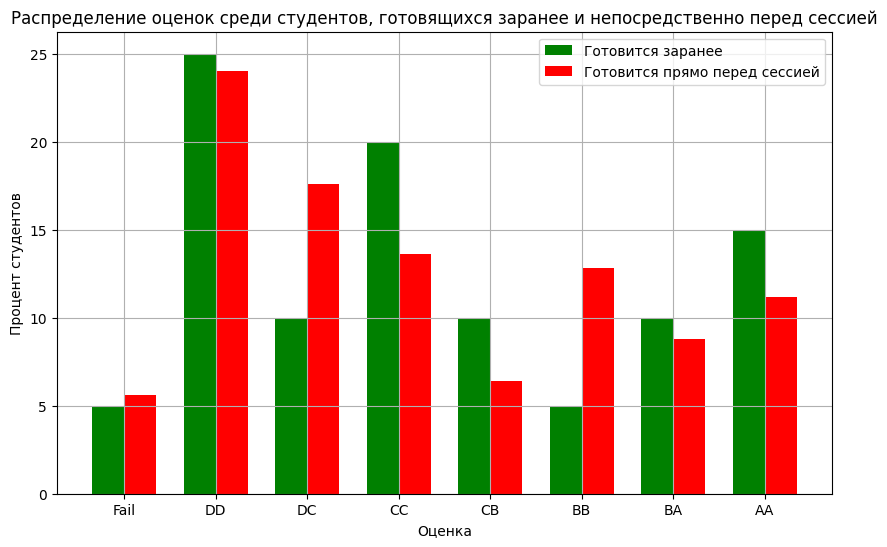

In [ ]:
study_during_semester = df[df['Preparation to midterm exams 2'] == 'regularly during the semester']
study_closest_to_exams = df[(df['Preparation to midterm exams 2'] == 'closest date to the exam') | (df['Preparation to midterm exams 2'] == 'never')]

study_during_semester_percentages = (study_during_semester['GRADE'].value_counts(normalize=True) * 100)[grade_order]
study_closest_to_exams_percentages = (study_closest_to_exams['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, study_during_semester_percentages, bar_width, color='green', label='Готовится заранее')
plt.bar([i + bar_width for i in index], study_closest_to_exams_percentages, bar_width, color='red', label='Готовится прямо перед сессией')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, готовящихся заранее и непосредственно перед сессией')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()

### 14. Стиль заметок и успеваемость
Студенты, которые всегда записывают лекции, получают более высокие оценки, чем те, кто делает это иногда или никогда.

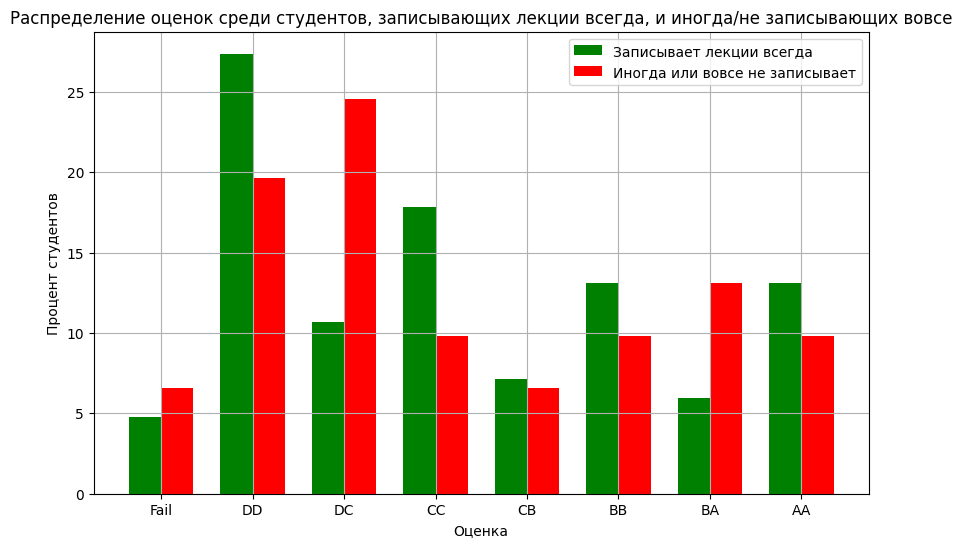

In [ ]:
taking_notes = df[df['Taking notes in classes'] == 'always']
sometimes_notes = df[(df['Taking notes in classes'] == 'sometimes') | (df['Taking notes in classes'] == 'never')]

taking_notes_percentages = (taking_notes['GRADE'].value_counts(normalize=True) * 100)[grade_order]
sometimes_notes_percentages = (sometimes_notes['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, taking_notes_percentages, bar_width, color='green', label='Записывает лекции всегда')
plt.bar([i + bar_width for i in index], sometimes_notes_percentages, bar_width, color='red', label='Иногда или вовсе не записывает')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, записывающих лекции всегда, и иногда/не записывающих вовсе')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()

### 15. Влияние обсуждений и успеваемость:
Студенты, которые считают обсуждения полезными, имеют более высокие оценки, чем те, кто не считает это важным.

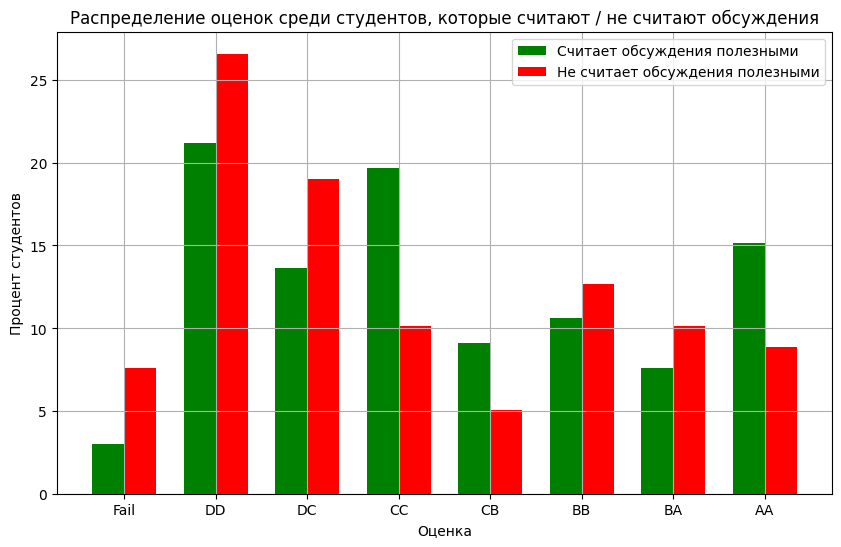

In [ ]:
discussions_improves = df[df['Discussion improves my interest and success in the course'] == 'always']
discussions_not_improves = df[(df['Discussion improves my interest and success in the course'] == 'sometimes') | (df['Discussion improves my interest and success in the course'] == 'never')]

discussions_improves_percentages = (discussions_improves['GRADE'].value_counts(normalize=True) * 100)[grade_order]
discussions_not_improves_percentages = (discussions_not_improves['GRADE'].value_counts(normalize=True) * 100)[grade_order]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grade_order))
plt.bar(index, discussions_improves_percentages, bar_width, color='green', label='Считает обсуждения полезными')
plt.bar([i + bar_width for i in index], discussions_not_improves_percentages, bar_width, color='red', label='Не считает обсуждения полезными')

plt.xlabel('Оценка')
plt.ylabel('Процент студентов')
plt.title('Распределение оценок среди студентов, которые считают / не считают обсуждения')
plt.xticks([i + bar_width / 2 for i in index], grade_order)
plt.legend()
plt.grid(True)
plt.show()